###### Project - Bank Churn Prediction


In [92]:
#Student Name : Makarand More

In [363]:
#Import common stuff
import warnings
warnings.filterwarnings("ignore")
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns

In [364]:
#Req#1 : Read the dataset
df_Bank=pd.read_csv("bank.csv")

In [365]:
#Req #2 : Drop the columns which are unique for all users like IDs 
#Req#3 : Perform bivariate analysis and give your insights from the same 
#In short perform Exploratory Data Analysis

In [366]:
df_Bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [367]:
df_Bank.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [368]:
print(df_Bank.info())
print()
print(df_Bank.shape)
print()
print(df_Bank.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

(10000, 14)

RowNumber          0
CustomerId         0
Surname            0
CreditScore 

In [369]:
df_Bank.isnull().sum().sum() #missing value count in dataframe for both row and column

0

In [370]:
#Note: The total count 10,000 with total 14 feature and fortunate there are no Missing (Null data) values. 
#Based on data we can see there are 3 categorical features and post exclude those we left with two categorical features that need to be encoded : Gender and Geography.
#The 1st three features : RowNumber, CustomerId and Surname can be exclude.

In [371]:
df_Bank_Updated=df_Bank.iloc[:,3:14] # here we create copy of dataset with required column same as Drop not required columns

In [372]:
df_Bank_Updated.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [373]:
n=df_Bank_Updated.nunique(axis=0)
print("No.of.unique values in each column :\n", 
      n)

No.of.unique values in each column :
 CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


In [374]:
df_Bank_Updated['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [375]:
#Note: The two independent variables Tenure and Balance min ZERO. Possible outliers that we may need to explore further.
#In total volume of 10K, the total 2037 for existed and 7963 for not existed

In [376]:
df_Bank_Updated.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [377]:
#Notes: The distribution of all independent variables where Avg is highly skewed. 
#The variabless CreditScore,Balance,HasCrCard and IsActiveMember are negetively skewed.

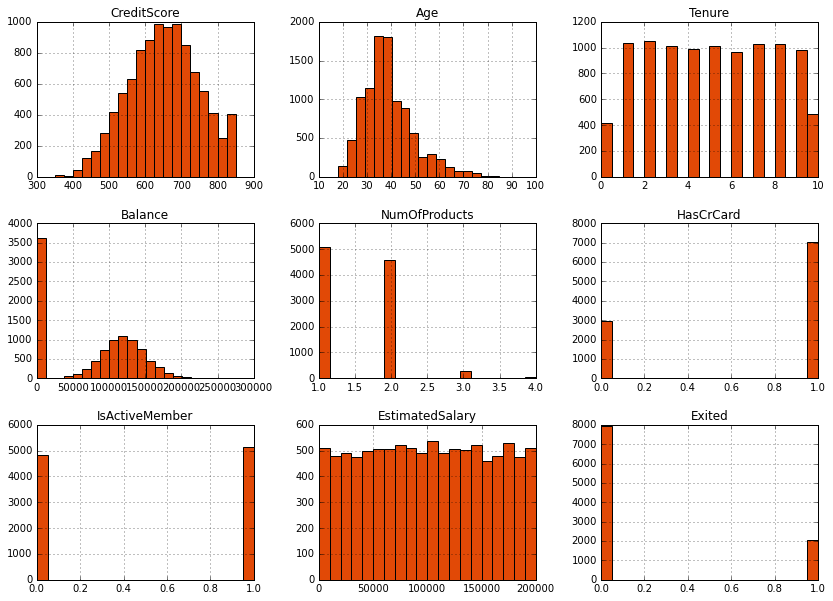

In [378]:
columns = list(df_Bank_Updated)[:] 
df_Bank_Updated[columns].hist(stacked=False, bins=20, figsize=(14,10), color='#E14906'); 

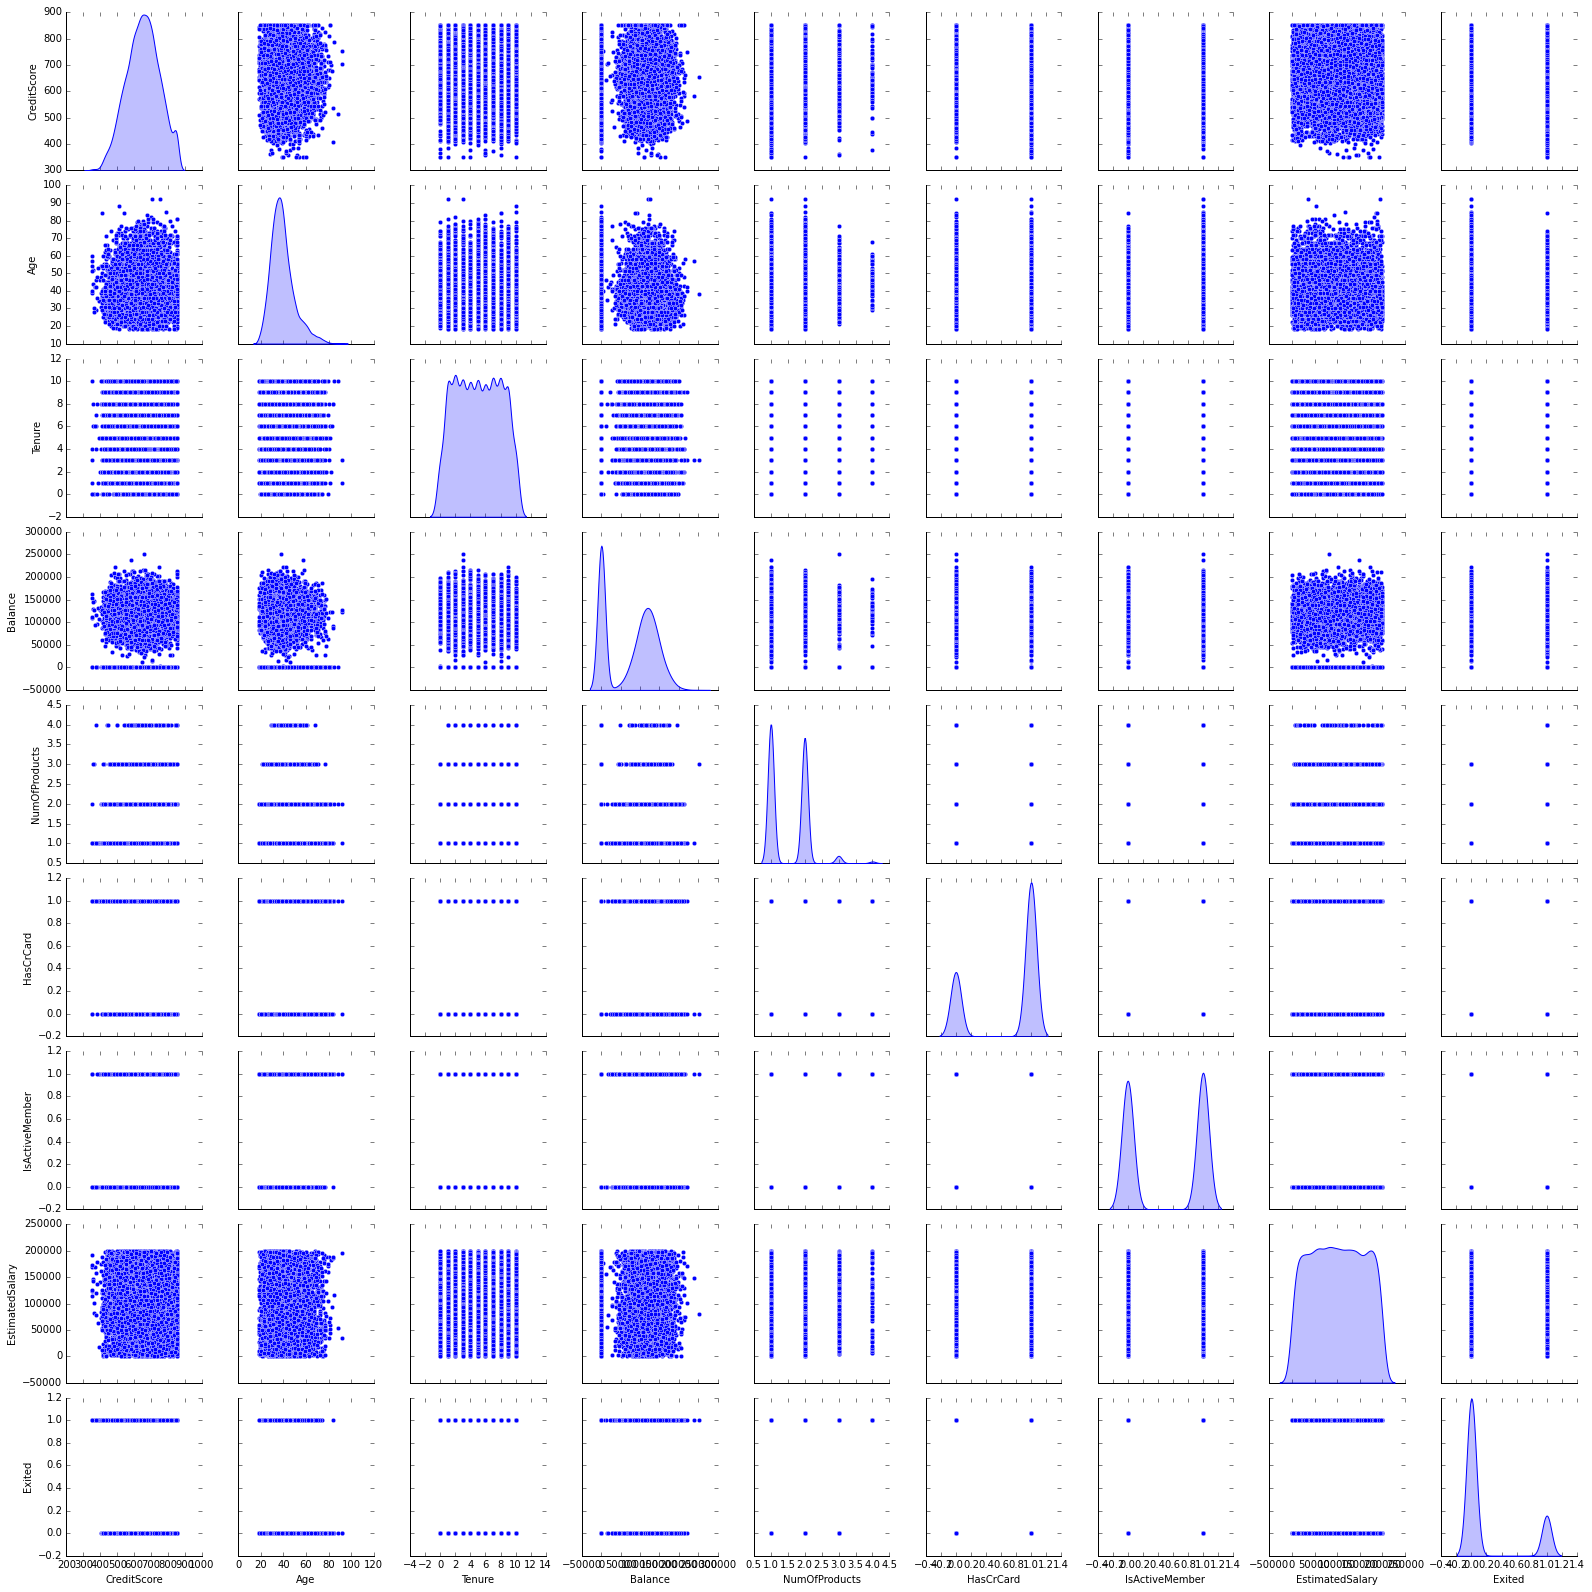

In [379]:
sns.pairplot(df_Bank_Updated, diag_kind='kde') 

<AxesSubplot:>

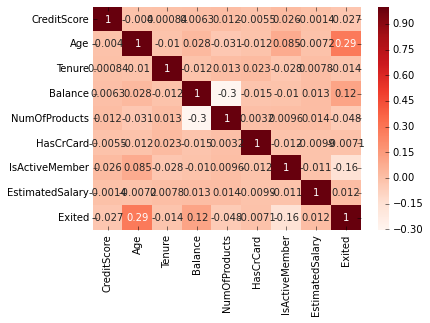

In [380]:
sns.heatmap(df_Bank_Updated.corr() , annot=True, cmap='Reds')

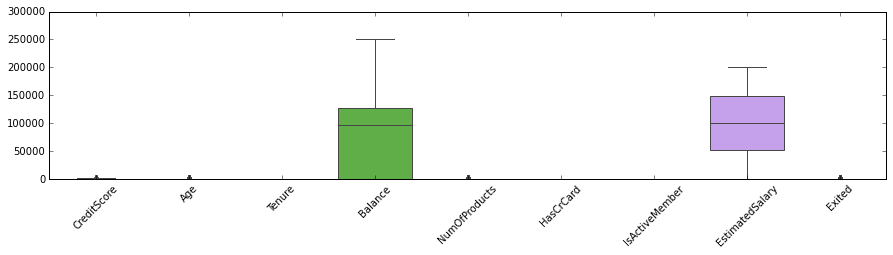

In [381]:
plt.subplots(figsize=(15, 3))
ax = sns.boxplot(data=df_Bank_Updated)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

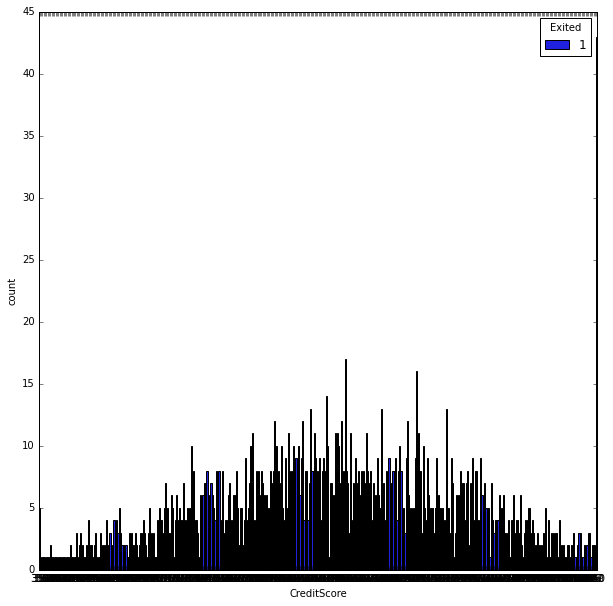

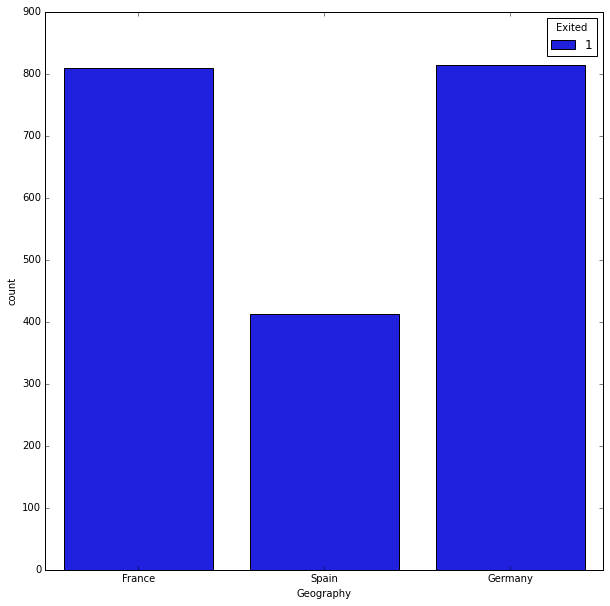

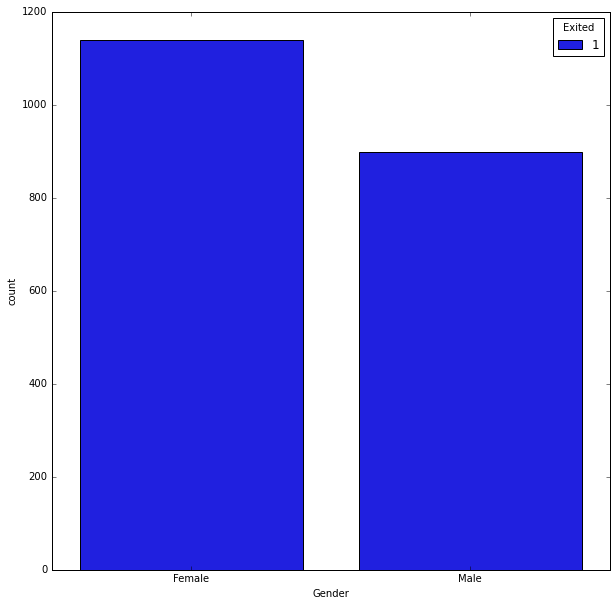

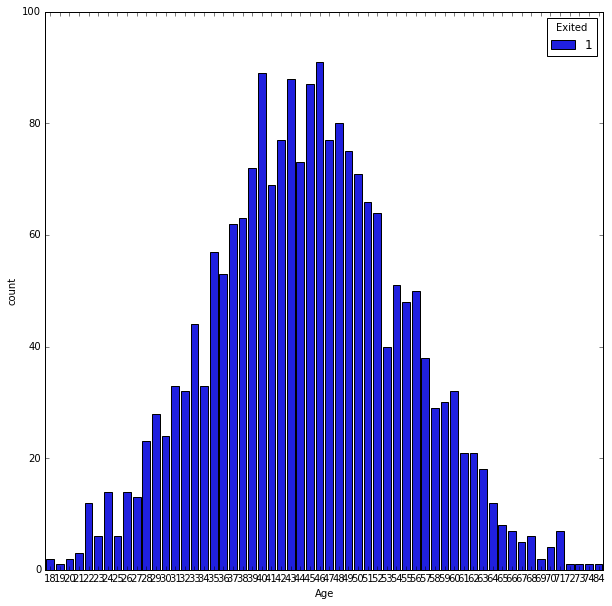

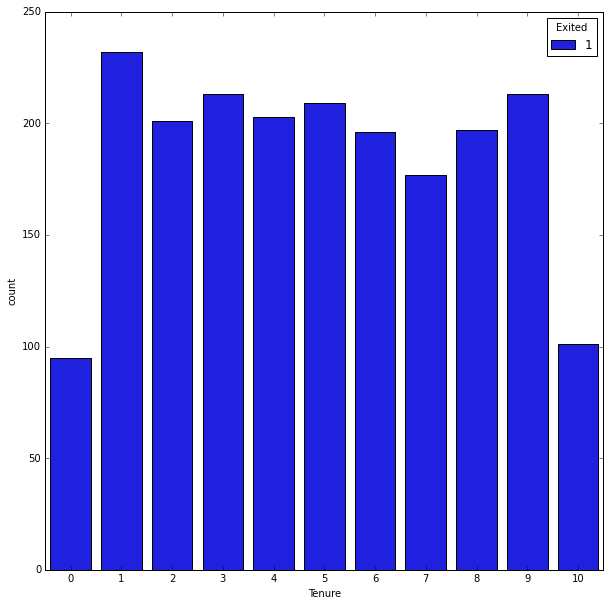

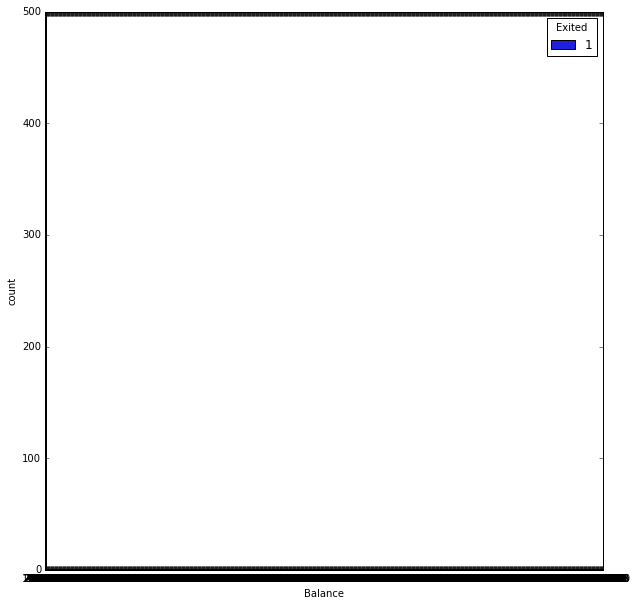

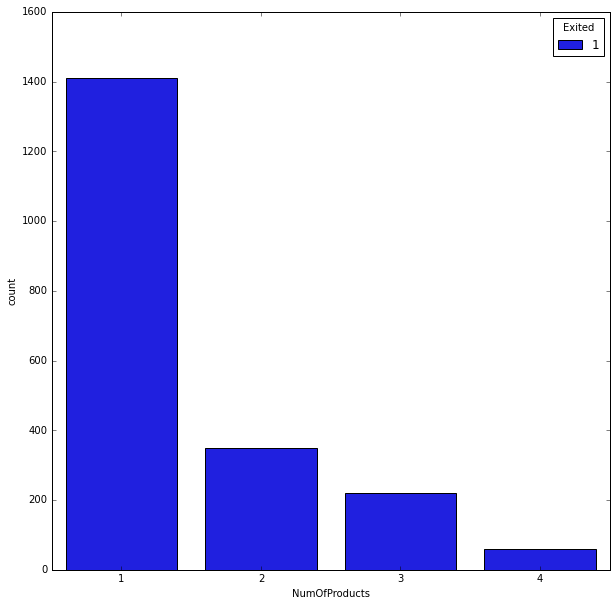

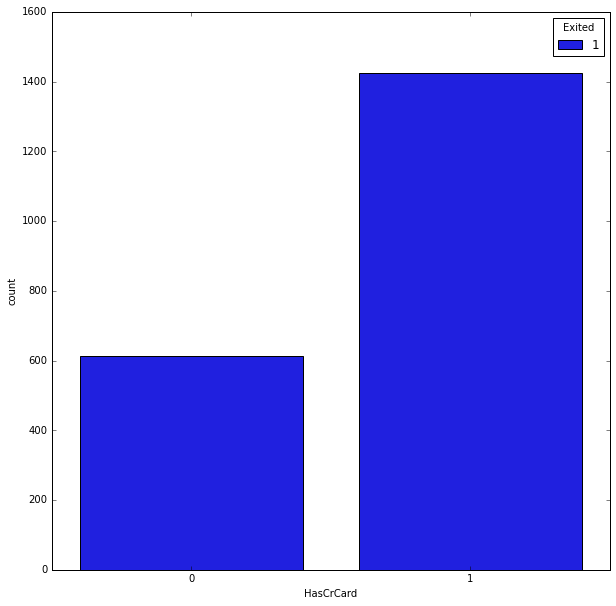

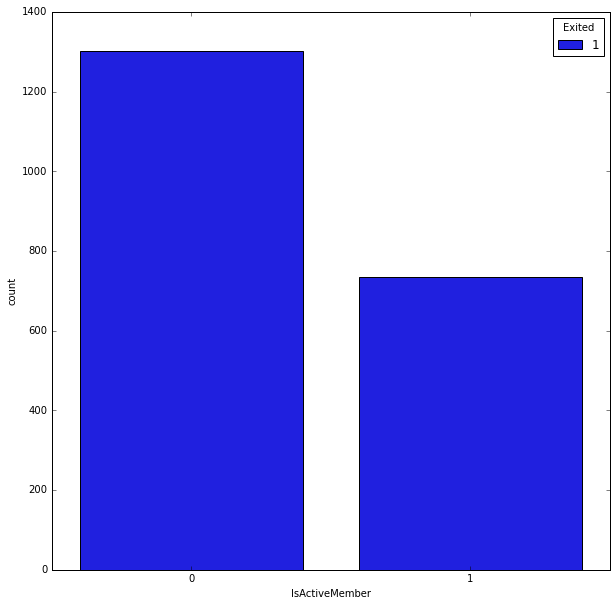

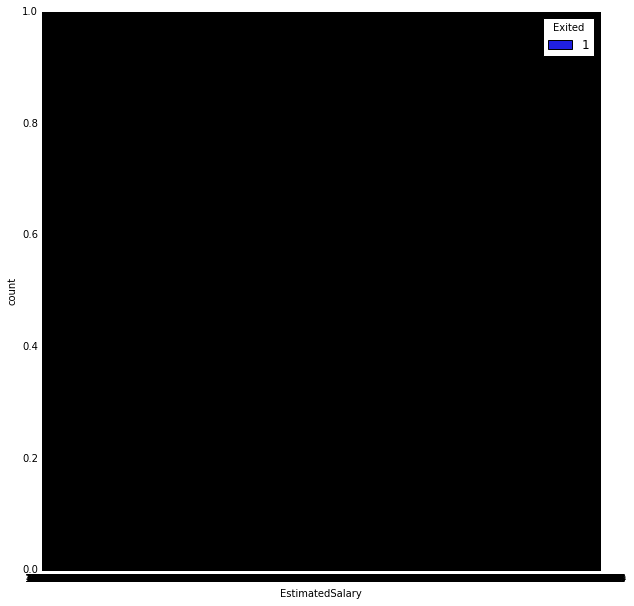

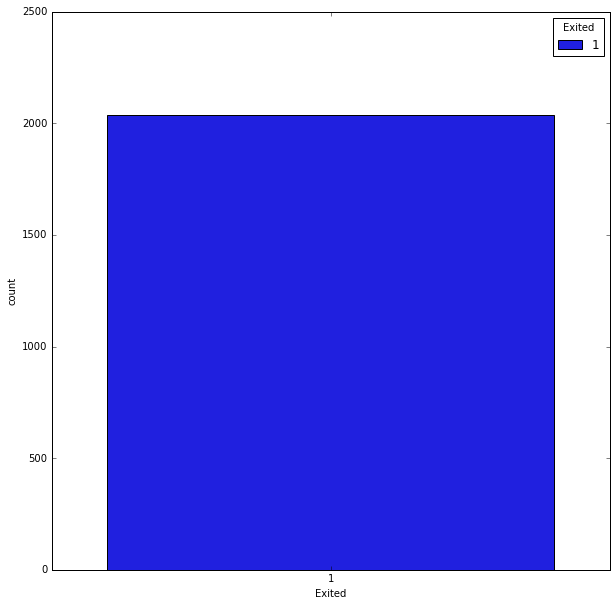

In [382]:
#Bivariate countplot respective Exited population
df_Bank_CPlot = df_Bank_Updated [df_Bank_Updated['Exited']==1]
for i in df_Bank_CPlot.columns:
    plt.figure(figsize = (10,10))
    sns.countplot(x = df_Bank_CPlot[i],data=df_Bank_CPlot, hue = df_Bank_CPlot['Exited']  )
    plt.show() 

In [383]:
#Notes: In Geography based data Spain has less number of account holder existed compare to France and Germany.
#In Gender more number of female account holder existed compare to man.
#The account holder who has or owned less number bank products existed more or early. 
#The account holder who hold Credit card existed more then not hold credit card.

In [384]:
df_Bank_Updated1 = pd.get_dummies(df_Bank_Updated)
df_Bank_Updated1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [385]:
#explorinfg column names
df_Bank_Updated1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [386]:
#df_Bank_Updated1=df_Bank_Updated1.astype('float32') #This is as part of improvment which not help though
#df_Bank_Updated1

In [387]:
#Req 4 : Distinguish the feature and target set and divide the data set into training and test sets 
#Req 5 : Normalize the train and test data (10points)

from sklearn.model_selection import train_test_split
X = df_Bank_Updated1[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']]
Y = df_Bank_Updated1['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

#let us scale the data as features are on different scales which might be a problem while modelling
from sklearn import preprocessing

#scaler = preprocessing.MinMaxScaler()

# 1st I used MinMaxScalar and then StandardScaler to check improvement 

scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.23082038, -0.94449979, -0.70174202, ..., -0.57273139,
        -0.91509065,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.57273139,
         1.09278791, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ..., -0.57273139,
         1.09278791, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.57273139,
         1.09278791, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.57273139,
         1.09278791, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ..., -0.57273139,
        -0.91509065,  0.91509065]])

In [388]:
#Req 6 : ReInitialize & build the model. Identify the points of improvement and implement the same.
#Req 7 : Predict the results using 0.5 as a threshold
#Req 8 : Print the Accuracy score and confusion matrix 


In [389]:
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [390]:
#Initialising the ANN - Defining as a sequence of layers or a Graph
model = Sequential()

In [391]:
#Input Layer
model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13 ))

In [392]:
X_train.shape

(8000, 13)

In [393]:
# Add the second hidden layer to achieve a deep neural network
model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))

In [394]:
# Add the Output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [395]:
model.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics=['accuracy'])

In [396]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 7)                 98        
_________________________________________________________________
dense_22 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 8         
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [397]:
#Training [Forward pass and Backpropagation]
model.fit(X_train, y_train.values, batch_size = 10, epochs = 100) #Tried with multiple variation as part of improvement

Epoch 1/100
800/800 [==============================] - 1s 821us/step - loss: 0.5516 - accuracy: 0.8025
Epoch 2/100
800/800 [==============================] - 1s 793us/step - loss: 0.4260 - accuracy: 0.8032
Epoch 3/100
800/800 [==============================] - 1s 787us/step - loss: 0.4306 - accuracy: 0.7889
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4336 - accuracy: 0.8122
Epoch 5/100
800/800 [==============================] - 1s 911us/step - loss: 0.4202 - accuracy: 0.8225
Epoch 6/100
800/800 [==============================] - 1s 809us/step - loss: 0.4199 - accuracy: 0.8267
Epoch 7/100
800/800 [==============================] - 1s 806us/step - loss: 0.4213 - accuracy: 0.8274
Epoch 8/100
800/800 [==============================] - 1s 811us/step - loss: 0.4161 - accuracy: 0.8289
Epoch 9/100
800/800 [==============================] - 1s 924us/step - loss: 0.3999 - accuracy: 0.8365
Epoch 10/100
800/800 [==============================] - 1s 1000us/step - lo

800/800 [==============================] - 1s 756us/step - loss: 0.3934 - accuracy: 0.8419
Epoch 80/100
800/800 [==============================] - 1s 746us/step - loss: 0.4033 - accuracy: 0.8323
Epoch 81/100
800/800 [==============================] - 1s 738us/step - loss: 0.4032 - accuracy: 0.8341
Epoch 82/100
800/800 [==============================] - 1s 750us/step - loss: 0.3953 - accuracy: 0.8360
Epoch 83/100
800/800 [==============================] - 1s 739us/step - loss: 0.3986 - accuracy: 0.8407
Epoch 84/100
800/800 [==============================] - 1s 746us/step - loss: 0.4087 - accuracy: 0.8293
Epoch 85/100
800/800 [==============================] - 1s 744us/step - loss: 0.4009 - accuracy: 0.8325
Epoch 86/100
800/800 [==============================] - 1s 744us/step - loss: 0.4067 - accuracy: 0.8323
Epoch 87/100
800/800 [==============================] - 1s 745us/step - loss: 0.3992 - accuracy: 0.8417
Epoch 88/100
800/800 [==============================] - 1s 751us/step - loss:

In [398]:
#Predicting the Test set results
y_pred = model.predict(X_test)
#Threshold of 50%
y_pred = (y_pred > 0.5)
y_pred[0:200]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [233]:
#According to our model the first 14 customers will not leave the bank while the 15th on the rank will.

In [408]:
X_test = preprocessing.normalize(X_test)

In [409]:
results = model.evaluate(X_test, y_test.values)

63/63 [==============================] - 0s 740us/step - loss: 0.5008 - accuracy: 0.8265


In [410]:
print(model.metrics_names)
print(results)   

['loss', 'accuracy']
[0.5007925033569336, 0.8264999985694885]


In [411]:
#Making the COnfusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1528,   57],
       [ 272,  143]], dtype=int64)

In [412]:
accuracy = (1528+143)/(2037)
accuracy

0.8203240058910162

In [413]:
#Overall Summary:
#Based on confusion matrix, we can see that out of 2037 observation the model accurately predicted 1528 plus 143 
#correct predictions and 272 plus 57 incorrect predictions.
#At the end, our model was able to predict the probability of our clients leaving the bank with an accuracy of 82-85%. 
#And we can improve further by using hyperparameters tuning . Also can use cross-validation to minimize variance.
#According to our model the first four customer will not leave the bank while the fifth on the rank will.
#Also based on EDA peformed important point to be noted - The account holder who has or owned less number bank products existed more or early.
#With MinMaxScaler got accuracy 83% whereas with StandardScaler got 82-85%

In [230]:
#Student Name : Makarand More